In [26]:
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #basid plotting
import seaborn as sns #for advance plotting
from sklearn.cluster import KMeans #Kmeans algorithm
from sklearn.preprocessing import StandardScaler #To normalize data

#Load the data
df=pd.read_csv("/Users/kamilkhaidir/Documents/UTM/SEM2/Adv AI/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
# Pick relevant column (Data Preprocessing)
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [28]:
#Normalize the data so that everything is in the same range so that KMeans dont get biased
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

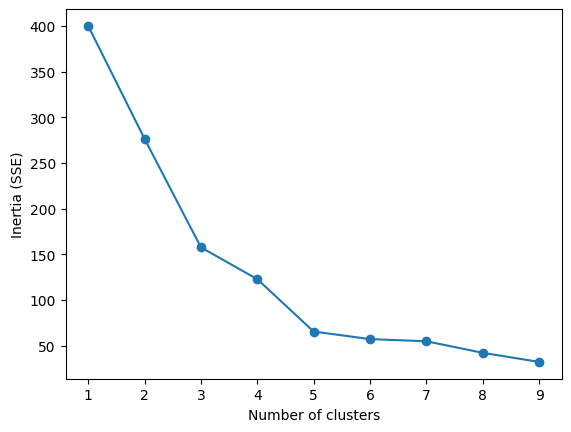

In [29]:
# Using elbow method to find the number of K
inertia = []
for i in range (1,10):
    kmeans = KMeans (n_clusters=i)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Show the values
plt.plot(range(1,10), inertia, marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSE)')
plt.show()

In [30]:
#Apply the KMeans. From the elbow method, we get K=3
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster result back into the new column original DataFrame
df['Cluster'] = clusters

In [31]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,44.154472,49.829268
1,86.538462,82.128205
2,87.000000,18.631579


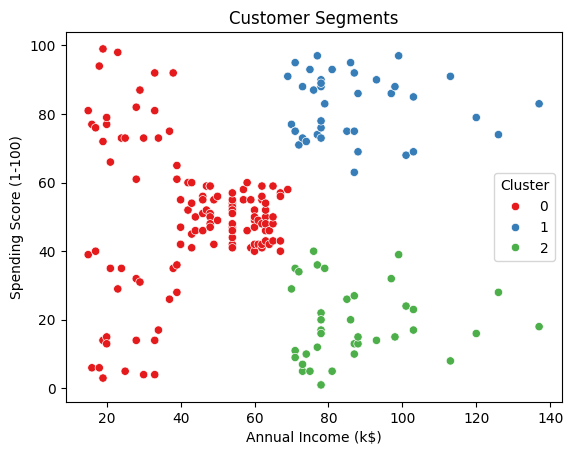

In [25]:
#Clusters result
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette ='Set1', data=df
)
plt.title('Customer Segments')
plt.show()